In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random 
from scipy import stats

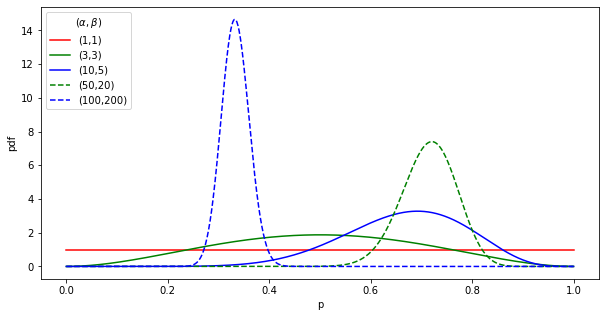

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
x =np.linspace(0,1,1000)
for (a,b,s) in [(1,1,"r-"),(3,3,"g"),(10,5,"b-"),
               (50,20,"g--"), (100,200,"b--")]:
    ax.plot(x, stats.beta(a,b).pdf(x),s,label="({0},{1})".format(a,b))
    
ax.legend(title= r"($\alpha,\beta$)",loc= "upper left")
ax.set_xlabel("p")
ax.set_ylabel("pdf");

###### 24 trials and 3 successes

In [7]:
n=  24
k=3
posterior = stats.distributions.beta(a=1+k,b=1+n-k)

(0.0, 6.28402961127992)

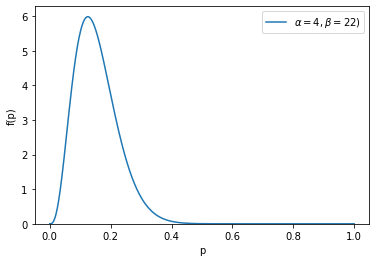

In [9]:
x = np.linspace(0,1,1000)
plt.plot(x,posterior.pdf(x),label = r"$\alpha= {},\beta = {}$)".format(1+k,1+n-k))
plt.legend()
plt.xlabel('p')
plt.ylabel('f(p)')
plt.ylim(ymin=0)

In [11]:
posterior.cdf(0.15)

0.5288787233077632

In [12]:
posterior.ppf(0.529)

0.15002155646992088

In [13]:
posterior.ppf(0.025)

0.04537945237170959

In [14]:
posterior.ppf(0.975)

0.3121903072862354

In [16]:
views_a = 2706
clicks_a=166
failures_a = views_a-clicks_a

views_b = 2294
clicks_b = 162
failures_b = views_b - clicks_b

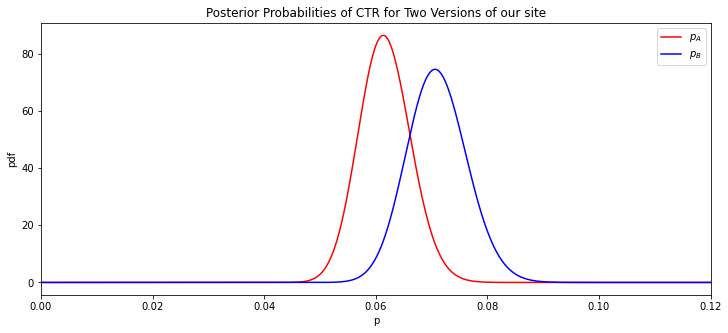

In [18]:
fig,ax = plt.subplots(figsize=(12,5))
x=np.linspace(0,1,10000)
for (a,b,s,label) in [(1+clicks_a,1+failures_a,"r","$p_A$"),
                     (1 + clicks_b, 1+failures_b,"b","$p_B$")]:
    ax.plot(x,stats.beta(a,b).pdf(x),s,label=label)
    
ax.legend(loc="upper right")
ax.set_xlabel("p")
ax.set_ylabel("pdf")
ax.set_xlim(0,0.12)
ax.set_title("Posterior Probabilities of CTR for Two Versions of our site");

###### Simulation-based answers

In [19]:
beta_a = stats.beta(1+clicks_a,1+failures_a)
beta_b = stats.beta(1+clicks_b, 1+failures_b)
samp_a = beta_a.rvs(size=100000)
samp_b = beta_b.rvs(size=100000)

In [20]:
(samp_b > samp_a).mean()

0.90655

In [21]:
samp_b > samp_a

array([ True, False,  True, ...,  True,  True,  True])

In [22]:
(samp_b > (samp_a + 0.01)).mean()

0.46082

In [23]:
x=np.linspace(0,0.15,2000)
prob_a = stats.beta(1+clicks_a,1+failures_a).pdf(x)
prob_b = stats.beta(1+clicks_b,1+failures_b).pdf(x)

In [24]:
## let's take advantafe of numpy's row vector multiplyer for size m

In [25]:
foo = np.array([1,5,3,2])
bar = np.array([9,8]).reshape(-1,1)
print(foo)
print(bar)
print(foo*bar)

[1 5 3 2]
[[9]
 [8]]
[[ 9 45 27 18]
 [ 8 40 24 16]]


In [27]:
joint_prod_grid = prob_a*(prob_b.reshape(-1,1))
joint_prob_grid = joint_prod_grid / joint_prod_grid.sum()

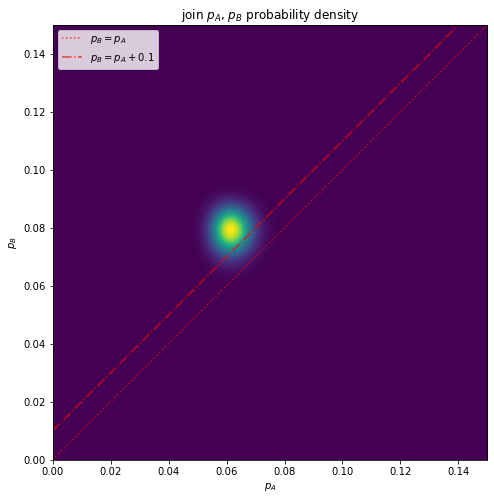

In [31]:
plt.figure(figsize=(8,8))
plt.imshow(joint_prob_grid,cmap = "viridis",extent=[0,0.15,0,0.15])

plt.plot([0,.15],[0,.15],'r:',label = '$p_B=p_A$',alpha = 0.7)
plt.plot([0,.15],[.01,.16],'r-.',label = '$p_B=p_A + 0.1$',alpha = 0.7)

plt.ylim([0,0.15])
plt.xlabel('$p_A$')
plt.ylabel('$p_B$')
plt.title('join $p_A$, $p_B$ probability density')
plt.legend();

ModuleNotFoundError: No module named 'mp1_toolkits'